In [19]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# To ingore warnings
import warnings
warnings.filterwarnings("ignore")

In [20]:
# importing the dataset
df=pd.read_csv('Datasets/pulsar_data_train_processed.csv')
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,0.406152,0.301691,0.301991,0.568644,0.578213,0.641702,-0.190285,0.637349,0.0
1,-1.351539,-1.591748,0.513056,0.610542,0.602696,0.674944,0.265557,0.020394,0.0
2,0.781246,1.055589,0.587776,0.617645,0.591884,0.449872,0.055292,0.557108,0.0
3,1.556296,0.378216,0.844093,0.596417,0.450837,1.032662,-1.232413,1.016054,0.0
4,-1.039841,-1.600735,0.617247,0.591027,0.590395,0.542733,0.031313,0.534750,0.0


In [21]:
# Splitting the dataset into features (X) and target (y)
X = df.drop('target_class', axis=1)
y = df['target_class']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for LinearSVC
param_grid = {
    'C': [0.1, 1, 10, 100]  # Example range for C, you can extend this
}

# Initialize the LinearSVC
linear_svc = LinearSVC()

# Initialize the GridSearchCV object
grid_search_linear = GridSearchCV(linear_svc, param_grid, cv=5, scoring='accuracy')

# Fit it to the data
grid_search_linear.fit(X_train, y_train)

# Best parameters and best score
print(grid_search_linear.best_params_)
print(grid_search_linear.best_score_)

{'C': 10}
0.9765518837636448


In [23]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = grid_search_linear.predict(X_test)

# Calculate metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2279
         1.0       0.97      0.79      0.87       227

    accuracy                           0.98      2506
   macro avg       0.97      0.90      0.93      2506
weighted avg       0.98      0.98      0.98      2506



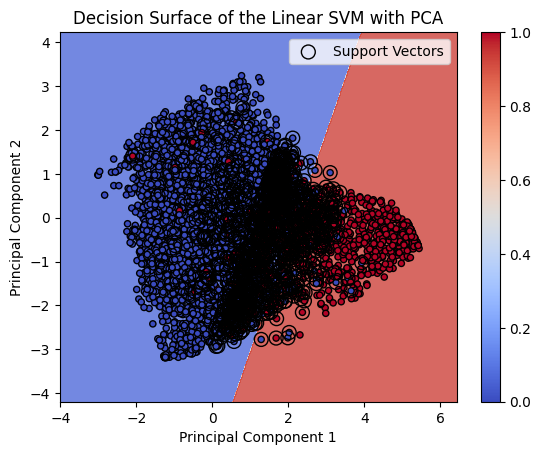

In [24]:
# Apply PCA to reduce to two dimensions for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train an SVM with Linear kernel on the first two principal components
linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train_pca, y_train)


# Create a grid to plot decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict the decision boundary on the mesh grid
Z = linear_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the support vectors
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm, s=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Surface of the Linear SVM with PCA')
plt.colorbar()

# Highlight the support vectors
sv_indices = linear_svc.support_  # Get the indices of support vectors
plt.scatter(X_train_pca[sv_indices, 0], X_train_pca[sv_indices, 1],
            facecolors='none', edgecolors='k', marker='o', s=100,
            label='Support Vectors')

plt.legend()
plt.show()

In [25]:
from sklearn.svm import SVC

# Define the parameter grid for SVC with RBF kernel
param_grid_rbf = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}

# Initialize the SVC with RBF kernel
rbf_svc = SVC(kernel='rbf')

# Initialize the GridSearchCV object
grid_search_rbf = GridSearchCV(rbf_svc, param_grid_rbf, cv=5, scoring='accuracy')

# Fit it to the data
grid_search_rbf.fit(X_train, y_train)

# Best parameters and best score
print(grid_search_rbf.best_params_)
print(grid_search_rbf.best_score_)

{'C': 100, 'gamma': 0.1}
0.9795454477578509


In [26]:
# Predict on the test set
y_pred = grid_search_rbf.predict(X_test)

# Calculate metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2279
         1.0       0.97      0.84      0.90       227

    accuracy                           0.98      2506
   macro avg       0.98      0.92      0.95      2506
weighted avg       0.98      0.98      0.98      2506



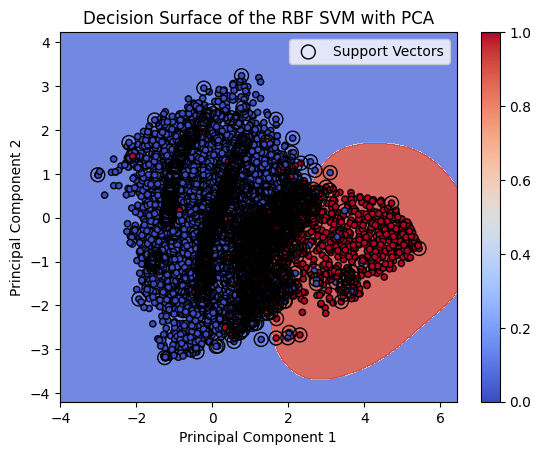

In [27]:

# Apply PCA to reduce to two dimensions for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train an SVM with RBF kernel on the first two principal components
svc_rbf = SVC(kernel='rbf', gamma='auto')
svc_rbf.fit(X_train_pca, y_train)

# Create a grid to plot decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict the decision boundary on the mesh grid
Z = svc_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the support vectors
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm, s=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Surface of the RBF SVM with PCA')
plt.colorbar()

# Highlight the support vectors
sv_indices = svc_rbf.support_  # Get the indices of support vectors
plt.scatter(X_train_pca[sv_indices, 0], X_train_pca[sv_indices, 1],
            facecolors='none', edgecolors='k', marker='o', s=100,
            label='Support Vectors')

plt.legend()
plt.show()

In [28]:
# Define the parameter grid for SVC with polynomial kernel
param_grid_poly = {
    'C': [0.1, 1, 10, 100],
    'degree': [2, 3, 4],
    'coef0': [0, 1]
}

# Initialize the SVC with polynomial kernel
poly_svc = SVC(kernel='poly')

# Initialize the GridSearchCV object
grid_search_poly = GridSearchCV(poly_svc, param_grid_poly, cv=5, scoring='accuracy')

# Fit it to the data
grid_search_poly.fit(X_train, y_train)

# Best parameters and best score
print(grid_search_poly.best_params_)
print(grid_search_poly.best_score_)

{'C': 1, 'coef0': 1, 'degree': 4}
0.9798446498524148


In [29]:
# Predict on the test set
y_pred = grid_search_poly.predict(X_test)

# Calculate metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2279
         1.0       0.97      0.83      0.90       227

    accuracy                           0.98      2506
   macro avg       0.98      0.92      0.94      2506
weighted avg       0.98      0.98      0.98      2506



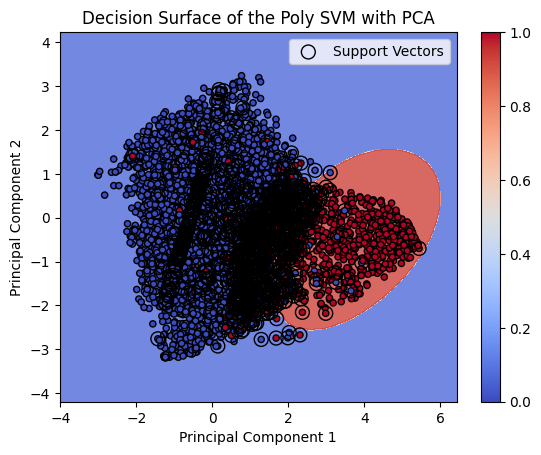

In [30]:
# Apply PCA to reduce to two dimensions for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train an SVM with Polynomial kernel on the first two principal components
poly_svc = SVC(kernel='poly', degree=4, coef0=1)
poly_svc.fit(X_train_pca, y_train)


# Create a grid to plot decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict the decision boundary on the mesh grid
Z = poly_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the support vectors
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm, s=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Surface of the Poly SVM with PCA')
plt.colorbar()

# Highlight the support vectors
sv_indices = poly_svc.support_  # Get the indices of support vectors
plt.scatter(X_train_pca[sv_indices, 0], X_train_pca[sv_indices, 1],
            facecolors='none', edgecolors='k', marker='o', s=100,
            label='Support Vectors')

plt.legend()
plt.show()

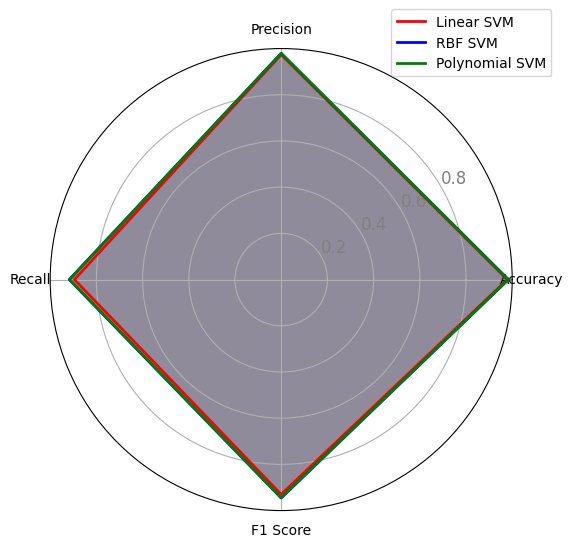

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from sklearn.metrics import classification_report


# Define metrics names for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']  # Assuming we're focusing on these 4 metrics

# Generate classification reports with 'output_dict=True' for easier parsing
report_linear = classification_report(y_test, grid_search_linear.predict(X_test), output_dict=True)
report_rbf = classification_report(y_test, grid_search_rbf.predict(X_test), output_dict=True)
report_poly = classification_report(y_test, grid_search_poly.predict(X_test), output_dict=True)

# Function to extract required metrics from the report
def extract_metrics(report):
    accuracy = report['accuracy']
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1 = report['macro avg']['f1-score']
    return [accuracy, precision, recall, f1]

# Extract metrics for each classifier
values_linear = extract_metrics(report_linear)
values_rbf = extract_metrics(report_rbf)
values_poly = extract_metrics(report_poly)

# Append the first value at the end to close the radar chart
values_linear += values_linear[:1]
values_rbf += values_rbf[:1]
values_poly += values_poly[:1]

# Number of variables we're plotting
num_vars = len(metrics)

# Calculate the angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()  # Close the loop
angles += angles[:1]  # Ensure the loop is closed by repeating the first value

# Plot setup
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw one axis per variable + add labels
plt.xticks(angles[:-1], metrics)

# Draw ylabels
ax.set_rlabel_position(30)
plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="grey", size=12)
plt.ylim(0, 1)

# Plot data
ax.plot(angles, values_linear, color='red', linewidth=2, linestyle='solid', label='Linear SVM')
ax.fill(angles, values_linear, color='red', alpha=0.25)
ax.plot(angles, values_rbf, color='blue', linewidth=2, linestyle='solid', label='RBF SVM')
ax.fill(angles, values_rbf, color='blue', alpha=0.25)
ax.plot(angles, values_poly, color='green', linewidth=2, linestyle='solid', label='Polynomial SVM')
ax.fill(angles, values_poly, color='green', alpha=0.25)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()
